<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('titanic.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df_titanic = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [187]:
# Alumno, elimine aquellas filas que tengan columnas vacias
# se borran las filas que tienen Nan
df_titanic = df_titanic.dropna()
# reindexar
df_titanic.reset_index(inplace=True)
# se hace un describe para verificar el dataset
des = df_titanic.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100                              # OJO!! el describe sigue 
des

,level_0,index,Survived,Pclass,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,356.500000,447.582633,0.406162,2.236695,29.699118,0.512605,0.431373
std,206.258333,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289
min,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,178.250000,221.250000,0.000000,1.000000,20.125000,0.000000,0.000000
50%,356.500000,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000
75%,534.750000,676.750000,1.000000,3.000000,38.000000,1.000000,1.000000
max,713.000000,890.000000,1.000000,3.000000,80.000000,5.000000,6.000000
Nan,NaN,NaN,0.000000,0.000000,177.000000,0.000000,0.000000
%Nan,NaN,NaN,0.000000,0.000000,19.865320,0.000000,0.000000


In [188]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print('la cantidad de filas a analizar son: ', df_titanic.shape[0])

la cantidad de filas a analizar son:  714


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [307]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_titanic.head()

,level_0,index,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,0,0,3,male,22.0,1,0
1,1,1,1,1,female,38.0,1,0
2,2,2,1,3,female,26.0,0,0
3,3,3,1,1,female,35.0,1,0
4,4,4,0,3,male,35.0,0,0


In [308]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó (1-Si 2-No)
df_titanic['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

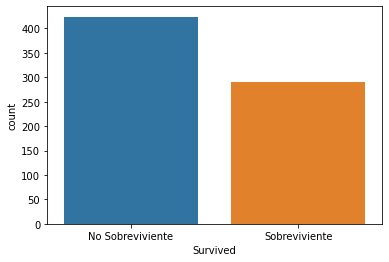

In [309]:
ax = sns.countplot(x=df_titanic['Survived'].replace({0: 'No Sobreviviente', 1: 'Sobreviviente'}), data=df_titanic)

In [310]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# lambda para filtrar por sobrevivencia y género y transformar en array de Numpy
survived_m = np.sum(np.array(df_titanic.apply(lambda x: 1 if x['Survived'] == 1 and x['Sex'] == 'male' else 0, axis=1)))
survived_f = np.sum(np.array(df_titanic.apply(lambda x: 1 if x['Survived'] == 1 and x['Sex'] == 'female' else 0, axis=1)))
# imprimir cantidad de sobrevivientes por género
print(f'sobrevivientes masculinos: ',survived_m, 'y sobrevivientes femeninos: ', survived_f)

sobrevivientes masculinos:  93 y sobrevivientes femeninos:  197


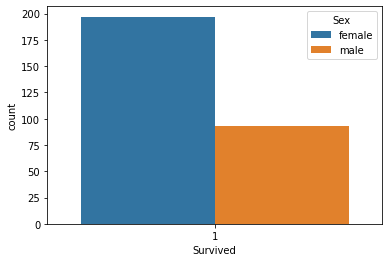

In [311]:
# Se filtra el df df_titanic con solo sobrevivientes creando un nuevo df df_titanic_survived
df_titanic_survived = df_titanic[df_titanic['Survived'] == 1]
# Utilice el gráfico d e seaborn countplot con hue="Sex"
ax = sns.countplot(x=('Survived'), hue="Sex", data=df_titanic_survived)

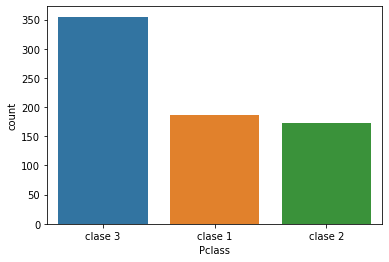

In [312]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
ax = sns.countplot(x=df_titanic['Pclass'].replace({1: 'clase 1', 2: 'clase 2', 3: 'clase 3'}), data=df_titanic)

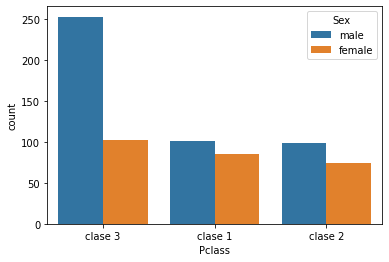

In [313]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
ax = sns.countplot(x=df_titanic['Pclass'].replace({1: 'clase 1', 2: 'clase 2', 3: 'clase 3'}), hue='Sex', data=df_titanic)

#### Transformar variables categóricas texto a clases numeradas

In [314]:
from sklearn.preprocessing import LabelEncoder

In [315]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].copy()
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [316]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le = LabelEncoder()
label_encoding = le.fit_transform(df_cod['Sex'])
df_cod['Sex_LE'] = label_encoding                            # aqui se puede remplazar los valores "female" y "male" por los valores del label_encoding
print(le.classes_)

['female' 'male']


In [317]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le.classes_

array(['female', 'male'], dtype=object)

In [318]:
df_cod = df_cod[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_LE']]

In [319]:
df_cod.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_LE
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [320]:
# Alumno, genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod.drop('Survived', axis=1).values 
y = df_cod['Survived'].values
X.shape

(714, 5)

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [321]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [322]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test

# Modelo de clasificación Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=4, max_depth=5, criterion='entropy', random_state = 0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)               # ojo: aqui salía un error por no haber cambiado los valores de la columna 'Sex' por los generados por el LabelEncoder

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [323]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.8

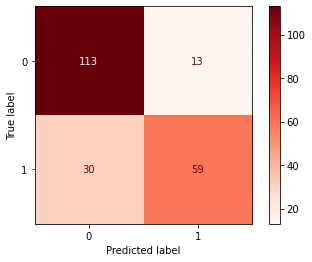

In [324]:
# Alumno, dibujar la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Reds)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [333]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

# Datos:
Pclass = 1
Sex = 'male'
Age = 3
SibSp = 1
Parch = 0
# Castear (transform: el algoritmo basado en 'fit' entrega, trasnsforma o predice nuevos resultados)
sex_encoder = int(le.transform([Sex]))
X_prueba = np.array([Pclass, sex_encoder, Age, SibSp, Parch])
# reshape: 
X_prueba = X_prueba.reshape(1,-1)
y_prueba = clf.predict(X_prueba)

if y_prueba == 1:
    print('sobreviviente')
else:
    print('No sobreviviente')

No sobreviviente


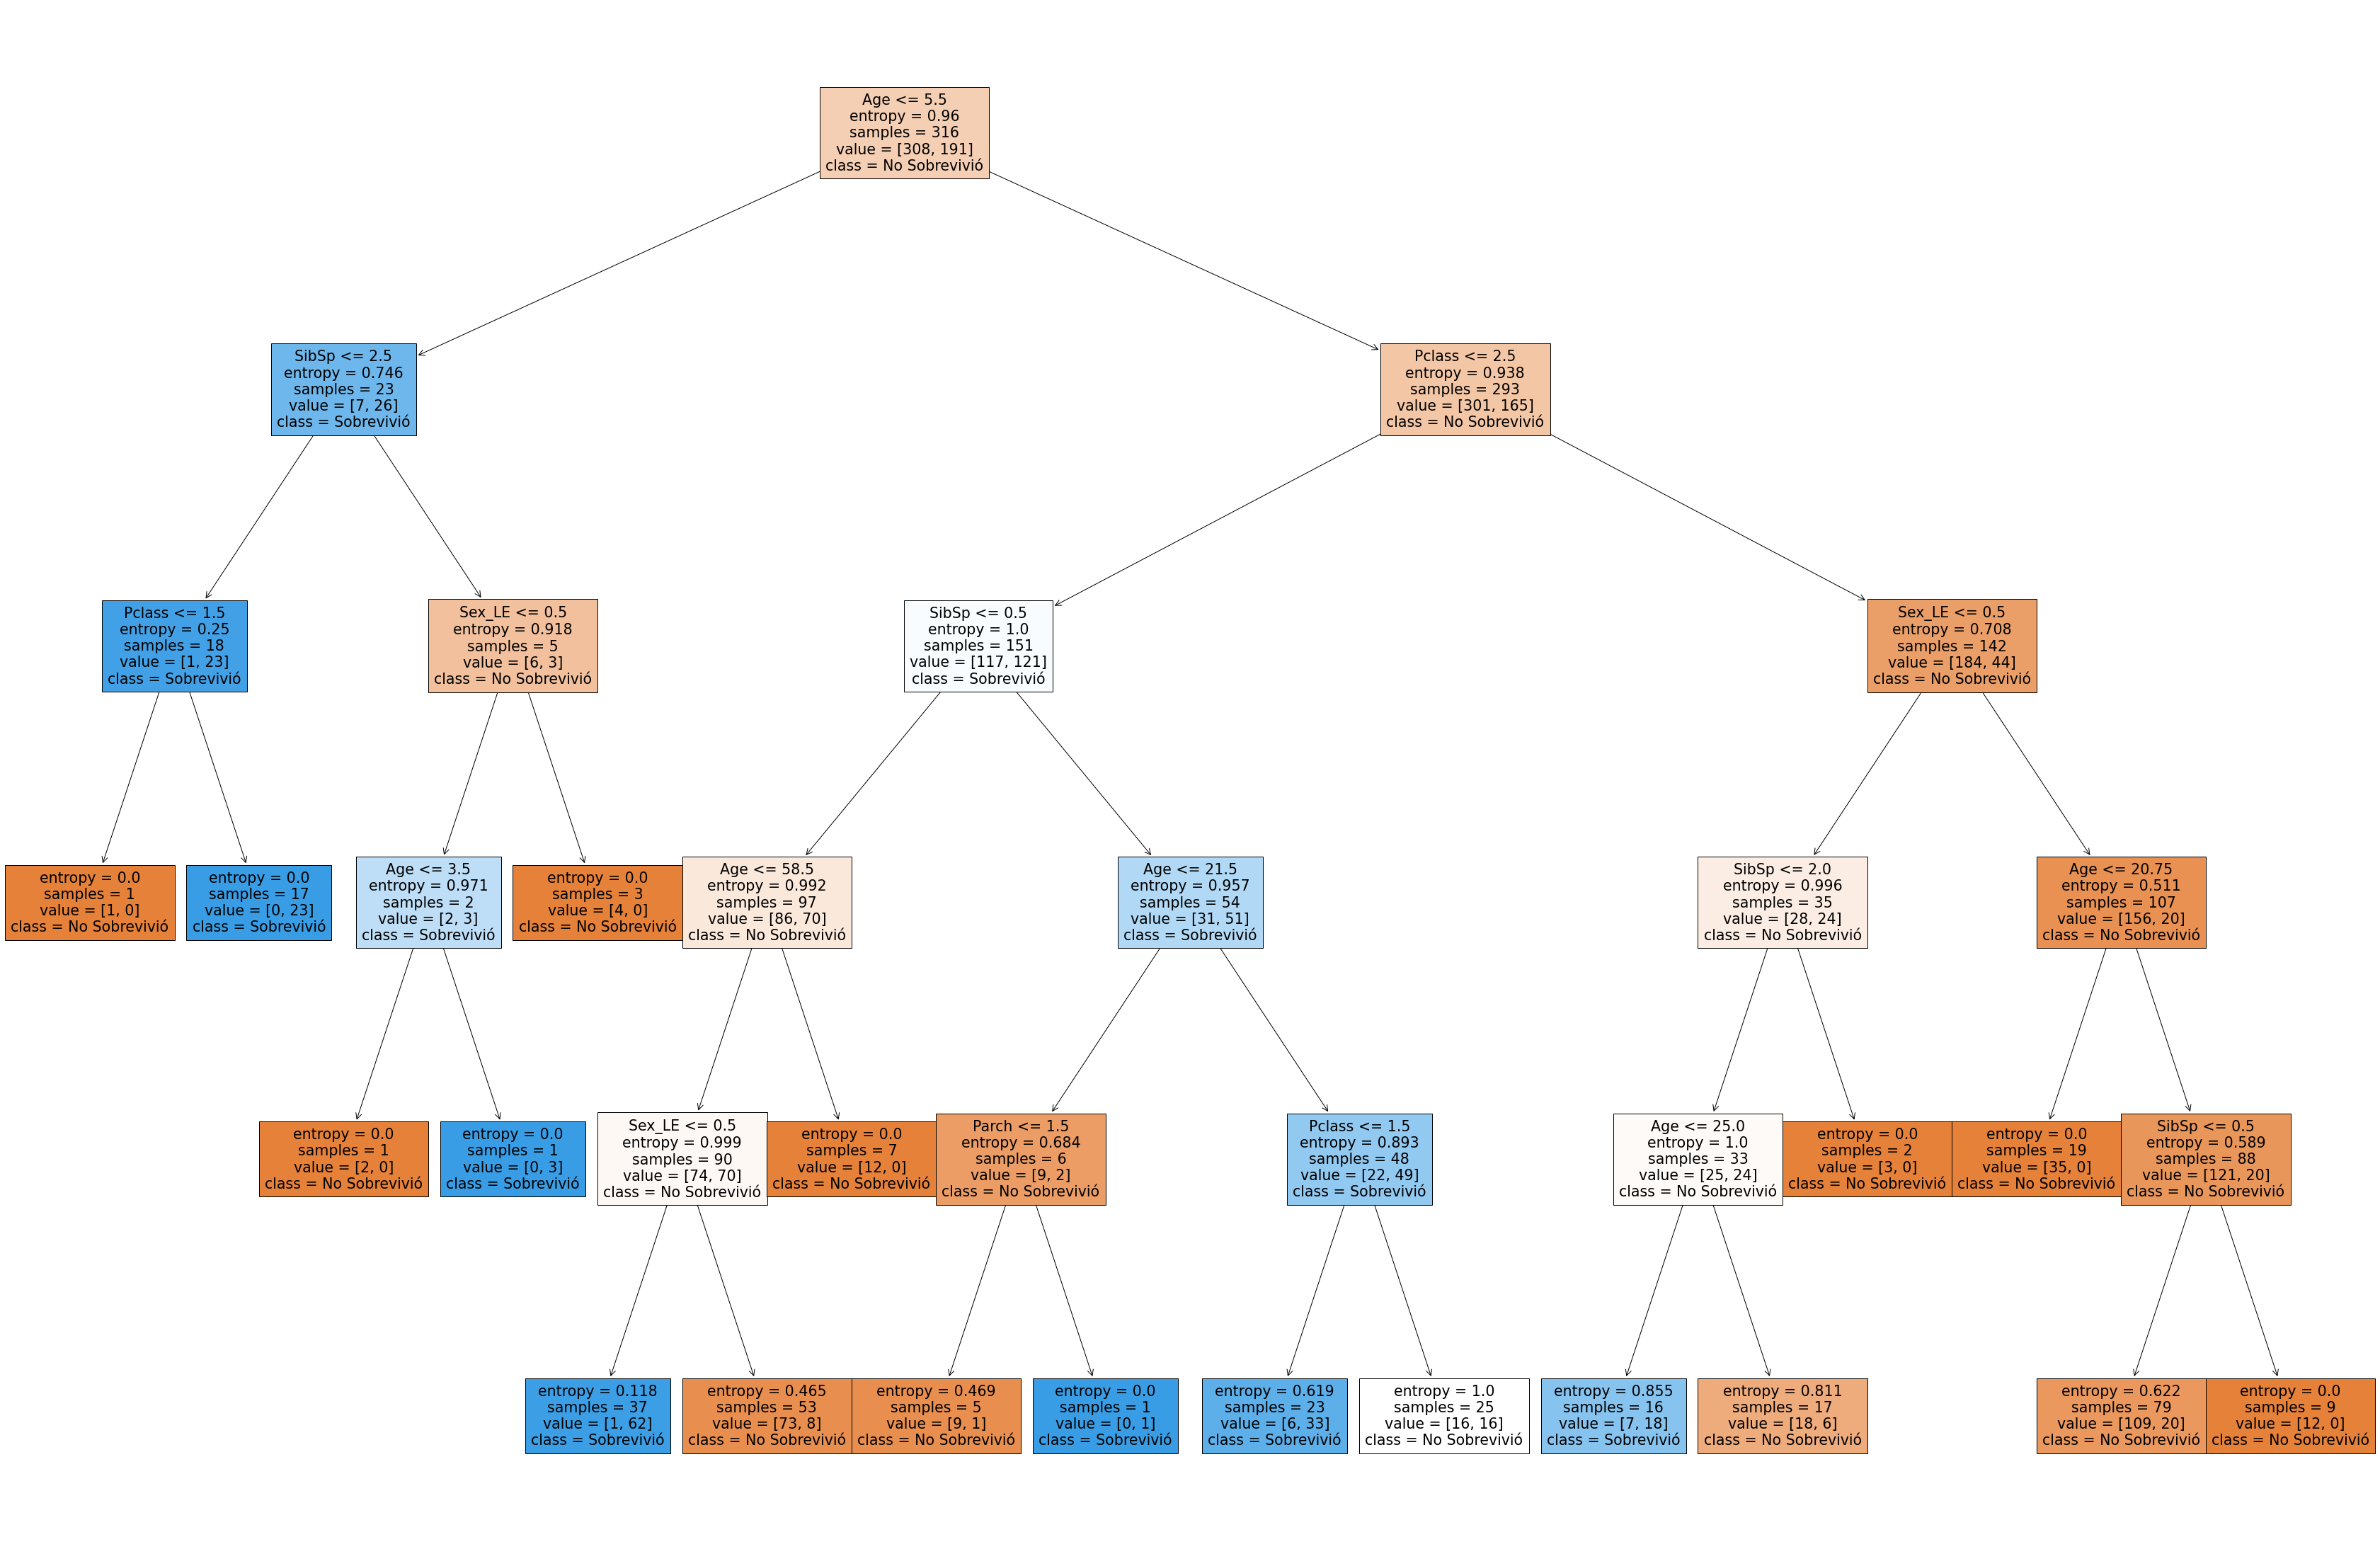

In [326]:
from sklearn import tree
estimator = clf.estimators_[0]

feature_names = df_cod.drop('Survived', axis=1).columns
class_names = ['No Sobrevivió', 'Sobrevivió']

fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot()
tree.plot_tree(estimator,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True, ax=ax);
plt.show()
filename = 'survivedtree.png'
fig.savefig(filename)